In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
import MetaTrader5 as mt5
from account_credentials import LOGIN,PASSWORD,SERVER
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [5]:
is_initialized = mt5.initialize()
print('initialize: ', is_initialized)

is_logged_in = mt5.login(LOGIN, PASSWORD, SERVER)
print('logged in: ', is_logged_in)
print('\n')
account_info = mt5.account_info()
print(datetime.now(),
    '| Login: ', account_info.login,
    '| Balance: ', account_info.balance,
    '| Equity: ' , account_info.equity)

initialize:  True
logged in:  True


2023-04-26 07:26:36.780086 | Login:  114123121 | Balance:  484.96 | Equity:  484.96


In [6]:
symbol = 'XAUUSD'
number_of_date= 10000
timeframe = mt5.TIMEFRAME_H1
from_date = datetime.now()

df = pd.DataFrame(mt5.copy_rates_from(symbol,timeframe,from_date,number_of_date))
df["time"] = pd.to_datetime(df["time"], unit="s")
df = df.rename(columns={'time': 'date','tick_volume':'volume'})
df = df[['date','open','high','low','close','volume']]
df = df.set_index("date")
print(df.head()) # just to make sure that sorted from old to new

                         open      high       low     close  volume
date                                                               
2021-08-16 08:00:00  1774.638  1776.738  1773.727  1776.017    3529
2021-08-16 09:00:00  1776.048  1776.376  1773.759  1776.206    3230
2021-08-16 10:00:00  1776.196  1776.754  1774.611  1774.708    3185
2021-08-16 11:00:00  1774.731  1774.891  1770.877  1772.150    4361
2021-08-16 12:00:00  1772.182  1781.252  1771.998  1778.329    6374


##### Adding Features

In [7]:
df['RSI'] = ta.rsi(df.close, length = 15)
df['EMAF'] = ta.ema(df.close, length = 20)
df['EMAM'] = ta.ema(df.close, length = 100)
df['EMAS'] = ta.ema(df.close, length = 150)
# df['Target'] = df['close'] - df.open
# df['Target'] = df['Target'].shift(-1)

# df['TargetClass'] = [1 if df.Target[i] > 0 else 0 for i in range(len(df))]
df['Target-Next-Close'] = df['close'].shift(-1)



df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop(['date','volume'], axis=1 , inplace=True)
# df = df[0:100]
df

,open,high,low,close,RSI,EMAF,EMAM,EMAS,Target-Next-Close
0,1805.960,1806.221,1803.125,1803.139,52.415269,1803.789686,1793.927712,1789.021820,1802.998
1,1803.117,1803.942,1802.687,1802.998,52.041451,1803.714288,1794.107322,1789.206935,1802.443
2,1802.663,1802.831,1802.388,1802.443,50.521889,1803.593213,1794.272385,1789.382247,1801.761
3,1802.415,1802.415,1801.175,1801.761,48.651549,1803.418716,1794.420674,1789.546204,1795.859
4,1801.772,1802.649,1793.992,1795.859,36.219103,1802.698743,1794.449156,1789.629817,1794.551
...,...,...,...,...,...,...,...,...,...
9845,1999.063,2003.868,1994.360,1995.770,56.127162,1990.149603,1991.680911,1994.080321,1999.182
9846,1995.735,1999.394,1994.743,1999.182,58.903359,1991.009831,1991.829448,1994.147893,1997.000
9847,1999.148,1999.150,1995.848,1997.000,56.455590,1991.580324,1991.931835,1994.185669,1997.657
9848,1996.207,1998.308,1996.063,1997.657,57.031630,1992.159055,1992.045204,1994.231647,2000.210


In [82]:
df.iloc[30:,:]

,open,high,low,close,RSI,EMAF,EMAM,EMAS,Target-Next-Close
30,1788.717,1789.072,1787.667,1787.909,37.745940,1791.525612,1793.301328,1790.240984,1787.008
31,1787.895,1788.195,1786.766,1787.008,36.105458,1791.095363,1793.176707,1790.198163,1786.442
32,1786.979,1788.290,1786.098,1786.442,35.079317,1790.652186,1793.043347,1790.148413,1784.545
33,1786.446,1787.222,1783.680,1784.545,31.830727,1790.070549,1792.875063,1790.074195,1786.983
34,1784.496,1787.967,1784.262,1786.983,39.540442,1789.776497,1792.758388,1790.033252,1784.475
...,...,...,...,...,...,...,...,...,...
9845,1999.063,2003.868,1994.360,1995.770,56.127162,1990.149603,1991.680911,1994.080321,1999.182
9846,1995.735,1999.394,1994.743,1999.182,58.903359,1991.009831,1991.829448,1994.147893,1997.000
9847,1999.148,1999.150,1995.848,1997.000,56.455590,1991.580324,1991.931835,1994.185669,1997.657
9848,1996.207,1998.308,1996.063,1997.657,57.031630,1992.159055,1992.045204,1994.231647,2000.210


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_x = StandardScaler().fit(df.iloc[:,:8])
scaled_x = scaler_x.transform(df.iloc[:,:8])
scaler_y = StandardScaler().fit(df.iloc[:,8].values.reshape(-1, 1))
scaled_y = scaler_y.transform(df.iloc[:,8].values.reshape(-1, 1))
scaled_x.shape

In [8]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaled_x = scaler_x.fit_transform(df.iloc[:,:8])
print(scaled_x.shape)
scaled_x

(9850, 8)


array([[0.41799255, 0.41303106, 0.43162363, ..., 0.43036592, 0.40575482,
        0.3935056 ],
       [0.41171444, 0.40796681, 0.43062084, ..., 0.43018362, 0.40622598,
        0.39400491],
       [0.41071188, 0.40549801, 0.42993628, ..., 0.42989087, 0.40665898,
        0.39447778],
       ...,
       [0.84460398, 0.84174598, 0.87285848, ..., 0.88442134, 0.92516449,
        0.94689532],
       [0.83810946, 0.83987494, 0.87335072, ..., 0.88582064, 0.92546188,
        0.94701934],
       [0.84130703, 0.84739688, 0.87699557, ..., 0.88767457, 0.925886  ,
        0.94723292]])

In [9]:
scaler_y = MinMaxScaler(feature_range=(0,1))
scaled_y = scaler_y.fit_transform(df.iloc[:,8].values.reshape(-1, 1))
print(scaled_y.shape)
scaled_y

(9850, 1)


array([[0.41146942],
       [0.41024373],
       [0.40873756],
       ...,
       [0.84136624],
       [0.84700444],
       [0.8506219 ]])

In [10]:
# # Save the array to a CSV file
# np.savetxt('arrayx.csv', scaled_x, delimiter=',')
# np.savetxt('arrayy.csv', scaled_y, delimiter=',')

In [11]:
X = []
backcandles = 30
print(scaled_x.shape[0])
for j in range(8): 
    X.append([])
    for i in range(0, scaled_x.shape[0]-backcandles+1):
        X[j].append(scaled_x[i:i+backcandles, j])
print(np.array(X).shape)

X = np.moveaxis(X, [0], [2])  # move the feature axis to the second dimension
print(X.shape)

9850
(8, 9821, 30)
(9821, 30, 8)


In [12]:
# X = []
# backcandles = 30
# print(df_a.shape[0])
# for j in range(8): # grabe open	high	low	close	RSI	EMAF	EMAM	EMAS
#     X.append([])
#     for i in range(backcandles, df_a.shape[0]):
#         X[j].append(df_a[i-backcandles:i, j])
# X=np.moveaxis(X, [0], [2])
# X.shape


# X = []
# backcandles = 30
# print(scaled_x.shape[0])
# for j in range(8): 
#     X.append([])
#     for i in range(backcandles, scaled_x.shape[0]):
#         X[j].append(scaled_x[i-backcandles:i, j])
# X = np.moveaxis(X, [0], [2])  # move the feature axis to the second dimension
# X = X[::-1]  # reverse the order of the samples to put the most recent data at the end
# X.shape


In [13]:
X[0,0,:]

array([0.41799255, 0.41303106, 0.43162363, 0.41178081, 0.50505363,
       0.43036592, 0.40575482, 0.3935056 ])

In [149]:
X[0,:,0]

array([0.41799255, 0.41171444, 0.41071188, 0.41016423, 0.40874431,
       0.39573097, 0.39288009, 0.39580164, 0.39345866, 0.39203212,
       0.39386057, 0.39065857, 0.39256873, 0.39107373, 0.391893  ,
       0.39210057, 0.39205199, 0.39534232, 0.38119172, 0.37035573,
       0.38089581, 0.38235768, 0.38108572, 0.38775028, 0.38449529,
       0.38499877, 0.38476691, 0.38622436, 0.3830842 , 0.38345519])

In [15]:
# X = X
y = scaled_y[(scaled_y.shape[0]-X.shape[0]):,:] # matching the shape of X
# y = np.reshape(y,(len(y),1))
print(X.shape) # 3D X has 8 colume and each colume contain xx backcandles (row, backcandle, column)
print(y.shape) # 2D contain 1 value (it's 1D array that reshape into 2D array)
print(y)

(9821, 30, 8)
(9821, 1)
[[0.37814595]
 [0.37615613]
 [0.37490614]
 ...
 [0.84136624]
 [0.84700444]
 [0.8506219 ]]


In [146]:
proportion = int(len(X)*0.8)
X_train, X_test = X[:proportion],X[proportion:]
y_train, y_test = y[:proportion],y[proportion:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X[1,1:10,1])

7856
(7856, 30, 8)
(7856, 1)
(1965, 30, 8)
(1965, 1)
[0.40549801 0.4045736  0.40509359 0.39424288 0.39094301 0.39035414
 0.38806312 0.39200519 0.39349847]


In [157]:
X[proportion,-1,:] # row สุดท้ายของ X_test

array([0.43727296, 0.4380079 , 0.45575243, 0.44235033, 0.51925229,
       0.46147527, 0.43599655, 0.42722342])

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the Sequential model
model = Sequential()

# Add the LSTM layer with 150 units and input shape (backcandles, 8)
model.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

# Add a dense layer with a single output neuron and linear activation function
model.add(Dense(units=1, activation='linear', name='output'))

# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Train the model on the training data with a batch size of 15 and for 30 epochs
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))


Epoch 1/30
524/524 [==============================] - 5s 8ms/step - loss: 4.9165e-04 - val_loss: 2.7387e-04
Epoch 2/30
524/524 [==============================] - 4s 8ms/step - loss: 1.1804e-04 - val_loss: 1.3404e-04
Epoch 3/30
524/524 [==============================] - 4s 8ms/step - loss: 1.0888e-04 - val_loss: 1.1851e-04
Epoch 4/30
524/524 [==============================] - 4s 8ms/step - loss: 1.0071e-04 - val_loss: 1.0159e-04
Epoch 5/30
524/524 [==============================] - 4s 8ms/step - loss: 9.5876e-05 - val_loss: 1.5680e-04
Epoch 6/30
524/524 [==============================] - 4s 8ms/step - loss: 9.0776e-05 - val_loss: 1.3809e-04
Epoch 7/30
524/524 [==============================] - 4s 8ms/step - loss: 8.9981e-05 - val_loss: 9.1420e-05
Epoch 8/30
524/524 [==============================] - 4s 8ms/step - loss: 9.2684e-05 - val_loss: 8.7104e-05
Epoch 9/30
524/524 [==============================] - 4s 8ms/step - loss: 8.2515e-05 - val_loss: 8.0788e-05
Epoch 10/30
524/524 [=======

best_model = None
best_loss = float('inf')

for i in range(20):
    # Define the Sequential model
    model = Sequential()

    # Add the LSTM layer with 150 units and input shape (backcandles, 8)
    model.add(LSTM(units=150, input_shape=(backcandles, 8), name='lstm_layer'))

    # Add a dense layer with a single output neuron and linear activation function
    model.add(Dense(units=1, activation='linear', name='output'))

    # Compile the model with the Adam optimizer and mean squared error loss function
    model.compile(optimizer='adam', loss='mse')

    # Train the model on the training data with a batch size of 15 and for 30 epochs
    model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_data=(X_test, y_test))

    # Evaluate the model on the validation data
    val_loss = model.evaluate(x=X_test, y=y_test)

    # If this is the best model so far, store it
    if val_loss < best_loss:
        best_model = model
        best_loss = val_loss

print(f'The best model has a validation loss of {best_loss}.')


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer (LSTM)           (None, 150)               95400     
                                                                 
 output (Dense)              (None, 1)                 151       
                                                                 
Total params: 95,551
Trainable params: 95,551
Non-trainable params: 0
_________________________________________________________________


In [24]:
y_hat = model.predict(X_test)
for i in range(10):
    print(y_hat[i], y_test[i])

62/62 [==============================] - 0s 4ms/step
[0.44037193] [0.44434678]
[0.44212115] [0.44227083]
[0.43821728] [0.43710965]
[0.43317884] [0.43994532]
[0.43771347] [0.44489669]
[0.4424968] [0.4218779]
[0.41797593] [0.41038728]
[0.40689853] [0.39512018]
[0.3925422] [0.39478892]
[0.39056474] [0.38949965]


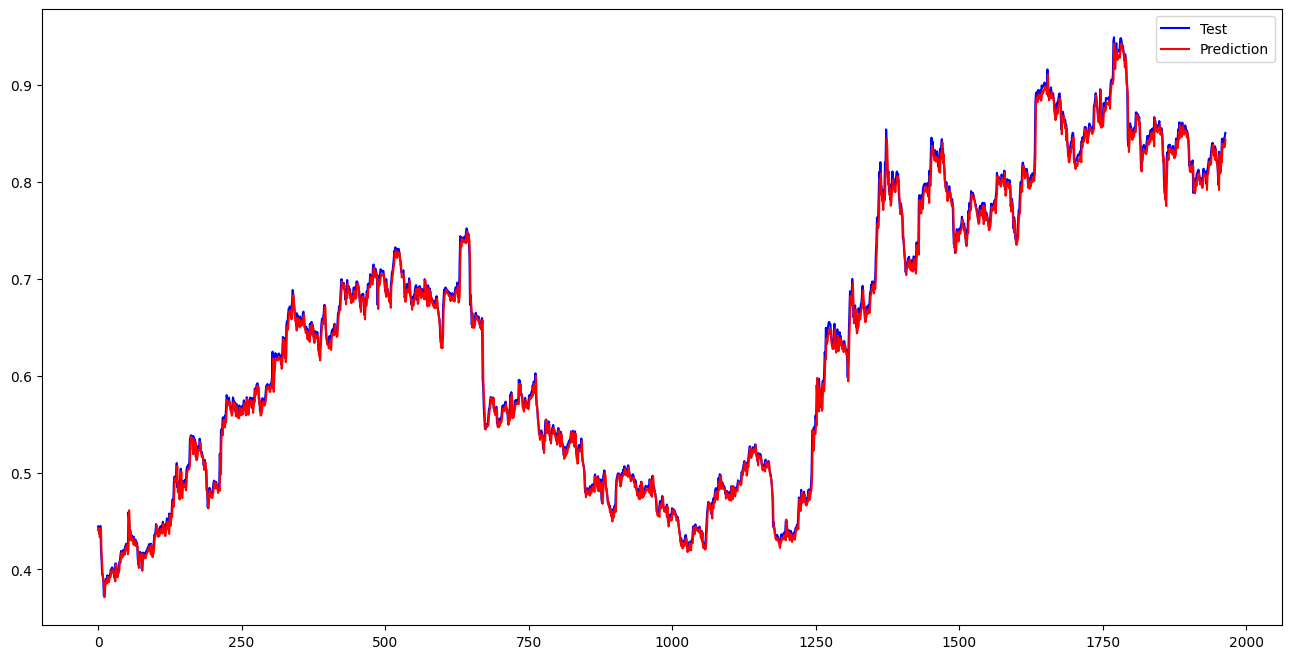

In [25]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_hat, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [87]:
y_hat_inverse = scaler_y.inverse_transform(y_hat)
print("y predict",y_hat_inverse)

print()

y_test_inverse = scaler_y.inverse_transform(y_test)
print("y actual",y_test_inverse)

y predict [[1816.0851]
 [1816.8773]
 [1815.1096]
 ...
 [1995.1389]
 [1995.3265]
 [1998.6145]]

y actual [[1817.885]
 [1816.945]
 [1814.608]
 ...
 [1997.657]
 [2000.21 ]
 [2001.848]]


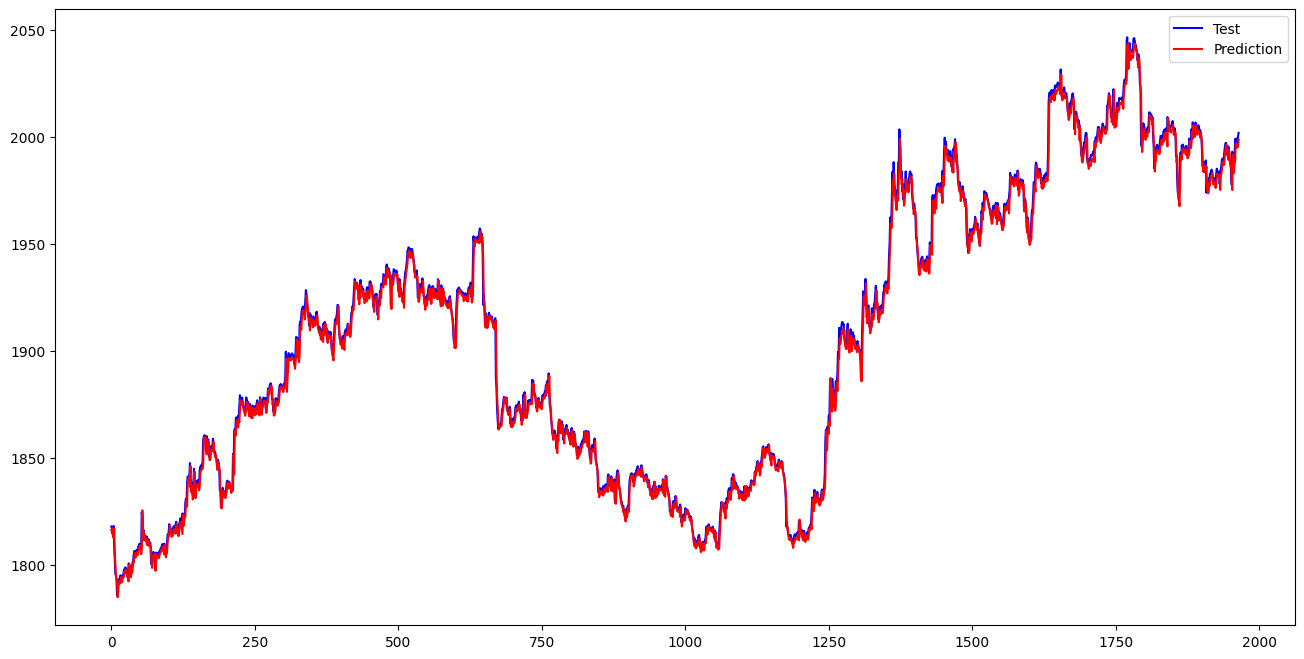

In [27]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inverse, color = 'blue', label = 'Test')
plt.plot(y_hat_inverse, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [28]:
#อันนี้ถ้าได้ค่าเป็นบวก ก็แค่บอกเป็นความในว่า ใน data ที่ใช้ test นี้ ส่วนไหญ่แล้วมี Tredn ราคาหลักไปทางนั้งมากกว่า เช่น ถ้าเป็น positve แปลว่าส่วนมาก ราคาขึ้น negative ก็แปลว่าส่วนมากราคาลง
diff = []
for i in range(0,len(y_hat_inverse)):
    val = float(y_hat_inverse[i] - y_test_inverse[i])
    diff.append(val)
pred_diff = sum(diff)/len(diff)
print(f"pred_diff {pred_diff}")



#อาจจะเป็น predict long or short ก็ได้ regardless of neg or pos, see below
# Predict < ClosePrice(from predict) > actual ---> Short ---> P - a = Positive Value
# Predict < ClosePrice(from predict) < actual ---> Short ---> P - a = Negative Value
# Predict > ClosePrice(from predict) > actual ---> Long ---> P - a = Positive Value
# Predict > ClosePrice(from predict) < actual ---> Long ---> P - a = Negative Value
# ด้วยเหตุผลนี้ ใช้ เป็น abs น่าจะ make sense มากกว่าในการทำ simulation
diff_pos = []
diff_neg = []
v_zero = []
for i in range(0,len(y_hat_inverse)):
    val = float(y_hat_inverse[i] - y_test_inverse[i])
    if val > 0:
        diff_pos.append(val)
    elif val < 0:
        diff_neg.append(val)
    elif val ==0:
        v_zero.append(val)
    else:
        raise ValueError("All conditions were not met")
pred_diff_pos = sum(diff_pos)/len(diff_pos)
pred_diff_neg = sum(diff_neg)/len(diff_neg)
print(f"pred_diff_pos {pred_diff_pos}")
print(f"pred_diff_neg {pred_diff_neg}")
print(f"v_zero {v_zero}")

#ใช้อันนี้น่าจะ make sense สุดเพราะ เราไม่สามารถรู้ได้ว่ามันจะ เป็น Negative Diff หรือว่า Positive Diff, regardless what's the type of trading order is.
diff = []
for i in range(0,len(y_hat_inverse)):
    val = abs(float(y_hat_inverse[i] - y_test_inverse[i]))
    diff.append(val)
pred_diff_abs = sum(diff)/len(diff)
print(f"pred_diff_abs {pred_diff_abs}")

pred_diff -1.807254616432097
pred_diff_pos 2.4381929052533295
pred_diff_neg -3.202310394349011
v_zero []
pred_diff_abs 3.0133225573512976


In [29]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)

# Print the mean squared error loss
print('Test loss:', loss)

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Compute the coefficient of determination (R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("TEST SET")
print('Mean squared error (MAE)(loss):', mae)
print('Mean squared error (MSE)(loss):', mse)
print('Root mean squared error (RMSE):', rmse)
print('R-squared (R2):', r2)
print()

loss = model.evaluate(X_train, y_train)
print('Training loss:', loss)

y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_train, y_pred)
print("TRAINING SET")
print('Mean squared error (MAE)(loss):', mae)
print('Mean squared error (MSE):', mse)
print('Root mean squared error (RMSE):', rmse)
print('R-squared (R2):', r2) # one is good 0 is bad, the value range from 0 to 1

62/62 [==============================] - 0s 4ms/step - loss: 8.6581e-05
Test loss: 8.658090519020334e-05
62/62 [==============================] - 0s 4ms/step
TEST SET
Mean squared error (MAE)(loss): 0.006654803432070992
Mean squared error (MSE)(loss): 8.65809026622941e-05
Root mean squared error (RMSE): 0.009304885956436764
R-squared (R2): 0.9961136256258518

246/246 [==============================] - 1s 4ms/step - loss: 6.5170e-05
Training loss: 6.516982830362394e-05
246/246 [==============================] - 1s 4ms/step
TRAINING SET
Mean squared error (MAE)(loss): 0.005608849467491139
Mean squared error (MSE): 6.516985314484856e-05
Root mean squared error (RMSE): 0.008072784720581155
R-squared (R2): 0.9979657292501952


#### Simulation

In [175]:
#Function to get prediction_raw (Didn't adjust with diff yet)
def get_pred(X_test_data,row):
    # Get a single input row
    input_row = X_test_data[row, :, :]  
    # print(f"shape {input_row.shape}")

    # Reshape the input row
    input_row = np.reshape(input_row, (1, input_row.shape[0], input_row.shape[1]))  
    # print(f"shape for prediction {input_row.shape}")

    # Make a prediction using the reshaped input row
    prediction_raw = model.predict(input_row)  
    prediction_raw = float(scaler_y.inverse_transform(prediction_raw)) 
    return prediction_raw


def get_act(y_test_data,row):
    actual_y = float(scaler_y.inverse_transform(y_test_data[row,:].reshape(-1,1)))
    return actual_y

def get_close(three_d_features_data_set,row):
    features = scaler_x.inverse_transform(three_d_features_data_set[row,-1,:].reshape(1, -1))
    close = float(features[0,3]) # close_price is at location 3 in dataframe
    return close


In [176]:
prediction_raw = get_pred(X_test,0)
actual_y = get_act(y_test,0)
close = get_close(X_test,0)
print(f"prediction raw {prediction_raw}")
print(f"actual_y {actual_y}")
print(f"close {close}")

1/1 [==============================] - 0s 16ms/step
prediction raw 1816.0850830078125
actual_y 1817.8850000000002
close 1816.981


In [177]:
#เนื่องจากพอสร้าง ออเด้อแล้วใช้ sl tp เท่ากัน ยังไงก็เสียมากกว่าเนื่องจาก spread
# if win >>> gain x
# if lost >>> loss x + spread

diff = pred_diff_abs
tp_sl_range = 3.1
spread = 200
# for loop

close = get_close(X_test,0)
prediction_raw = get_pred(X_test,0)
actual_y = get_act(y_test,0)

if prediction_raw == 0:
    print("Do nothing")

# LONG
elif prediction_raw > close:
    # must be after prediction >= close
    target_price_l = close + tp_sl_range + spread # เพิ่ม spread เพิ่มเมื่อ win จะได้เอา spread คืน
    # must be after prediction >= close, because we don't know whether to plus or minus prediction with pred_diff
    prediction = prediction_raw - pred_diff
    if prediction <= target_price_l:
        print("Do nothing")
    elif prediction > target_price_l and actual_y > target_price_l:
        print("trade L win")
    elif prediction > target_price_l and actual_y < target_price_l:
        print("Trade L loss")
    else:
        print("error")
        print(prediction)


# SHORT
elif prediction_raw < close:
        # must be after prediction >= close
    target_price_s = close - tp_sl_range - spread # เพิ่ม spread เพิ่มเมื่อ win จะได้เอา spread คืน
    # must be after prediction >= close, because we don't know whether to plus or minus prediction with pred_diff
    prediction = prediction_raw + pred_diff
    if prediction >= target_price_s:
        print("Do nothing")
    elif prediction < target_price_s and actual_y < target_price_s:
        print("trade L win")
    elif prediction < target_price_s and actual_y > target_price_s:
        print("Trade L loss")
    else:
        print("error")
        print(prediction)

else:
    raise ValueError("Error condition not met")

print(f"close {close}")
print(f"prediction_raw {prediction_raw}")
print(f"prediction {prediction}")
try:
    print(f"target_price_l {target_price_l}")
except:
    pass
try:
    print(f"target_price_s {target_price_s}")
except:
    pass

1/1 [==============================] - 0s 15ms/step
Do nothing
close 1816.981
prediction_raw 1816.0850830078125
prediction 1814.2778283913804
target_price_s 1613.881


In [ ]:
def predict_simu(model, X_test, data_simu_y, initial_capital):
    capital = initial_capital
    win_count = 0
    lost_count = 0
    no_order_count = 0
    record_result = []
    record_capital = []
    record_date = []
    consecutive_lost = 0
    consecutive_lost_max = 0
    diff = pred_diff_abs
    tp = 3.1
    sl = 3.1
    spread = 200
    for i in range(0, len(X_test)):
        prediction = float(model.predict(X_test[0, :, :].reshape(1, 30, 8)))

        if prediction == 1 and data_simu_y[i] == 1:
            outcome = 3
            capital += outcome
            win_count += 1
            order_record = 'win-------- prediction = {0}, actual = {1}'.format(prediction,data_simu_y[i])
            result = 'win'
        elif prediction == 1 and data_simu_y[i] == 0:
            outcome = -3.3
            capital += outcome
            lost_count += 1
            order_record = 'lost------- prediction = {0}, actual = {1}'.format(prediction,data_simu_y[i])
            result = 'lost'
        elif prediction == 0:
            no_order_count +=1
            order_record = 'no order--- prediction = {0}, actual = {1}'.format(prediction, data_simu_y[i])
            capital = capital
            result = 'no order'
        else:
            raise ValueError('no condition met')
        record_date.append(X_test.iloc[i].name)
        record_result.append(order_record)
        record_capital.append(capital)

        #Calculate Consecutive Lost
        if result == 'lost':
            consecutive_lost += -3.3
            if consecutive_lost <= consecutive_lost_max:
                consecutive_lost_max = consecutive_lost
        if result == 'win':
            if consecutive_lost <= consecutive_lost_max:
                consecutive_lost_max = consecutive_lost
            consecutive_lost = 0

    total_return = ((capital - initial_capital) / initial_capital)*100
    sim_df = pd.DataFrame({'record_date':record_date,
                           'record_result':record_result,
                           'record_capital': record_capital})
    sim_df.set_index('record_date', inplace=True)

    return win_count, lost_count, no_order_count, capital, total_return, sim_df, consecutive_lost_max
